<a href="https://colab.research.google.com/github/Rafaeltafolla/MachineLearning/blob/main/Arbol_de_decisiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [4]:
df=pd.read_csv("https://gist.githubusercontent.com/javierIA/403a1027bd6894f865a508652c338d20/raw/fd09d4255ce0ef4ab01eb6a5144c6c887f72045c/datos")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,448.483826,0.403657,2.241913,29.621899,0.514768,0.431786,34.534323
std,258.849806,0.490976,0.836147,14.493108,0.931147,0.854517,52.968619
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,444.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.550000
75%,677.500000,1.000000,3.000000,38.000000,1.000000,1.000000,32.750000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
706,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
707,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
708,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
709,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
#combinamos la variable categoria de sex por la variable numerica sex_male
df=pd.get_dummies(df,columns=["Sex"],drop_first=True)
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
706,886,0,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,NaN,Q,0
707,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1
708,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0
709,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1


In [8]:
data=df[["Sex_male","Fare","Age","Pclass","SibSp","Survived"]]
data

,Sex_male,Fare,Age,Pclass,SibSp,Survived
0,1,7.2500,22.0,3,1,0
1,0,71.2833,38.0,1,1,1
2,0,7.9250,26.0,3,0,1
3,0,53.1000,35.0,1,1,1
4,1,8.0500,35.0,3,0,0
...,...,...,...,...,...,...
706,0,29.1250,39.0,3,0,0
707,1,13.0000,27.0,2,0,0
708,0,30.0000,19.0,1,0,1
709,1,30.0000,26.0,1,0,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex_male  711 non-null    uint8  
 1   Fare      711 non-null    float64
 2   Age       711 non-null    float64
 3   Pclass    711 non-null    int64  
 4   SibSp     711 non-null    int64  
 5   Survived  711 non-null    int64  
dtypes: float64(2), int64(3), uint8(1)
memory usage: 28.6 KB


In [10]:
, RandomForestRegressor
from pandas.core import describe
from sklearn.model_selection import train_test_split

X=data.drop(["Survived"],axis=1)
Y=data.Survived

X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
clt=RandomForestClassifier(random_state=2023,n_estimators=20,min_samples_leaf=8,max_leaf_nodes=100)

clt.fit(X_train,Y_train)

RandomForestClassifier(max_leaf_nodes=100, min_samples_leaf=8, n_estimators=20,
                       random_state=2023)

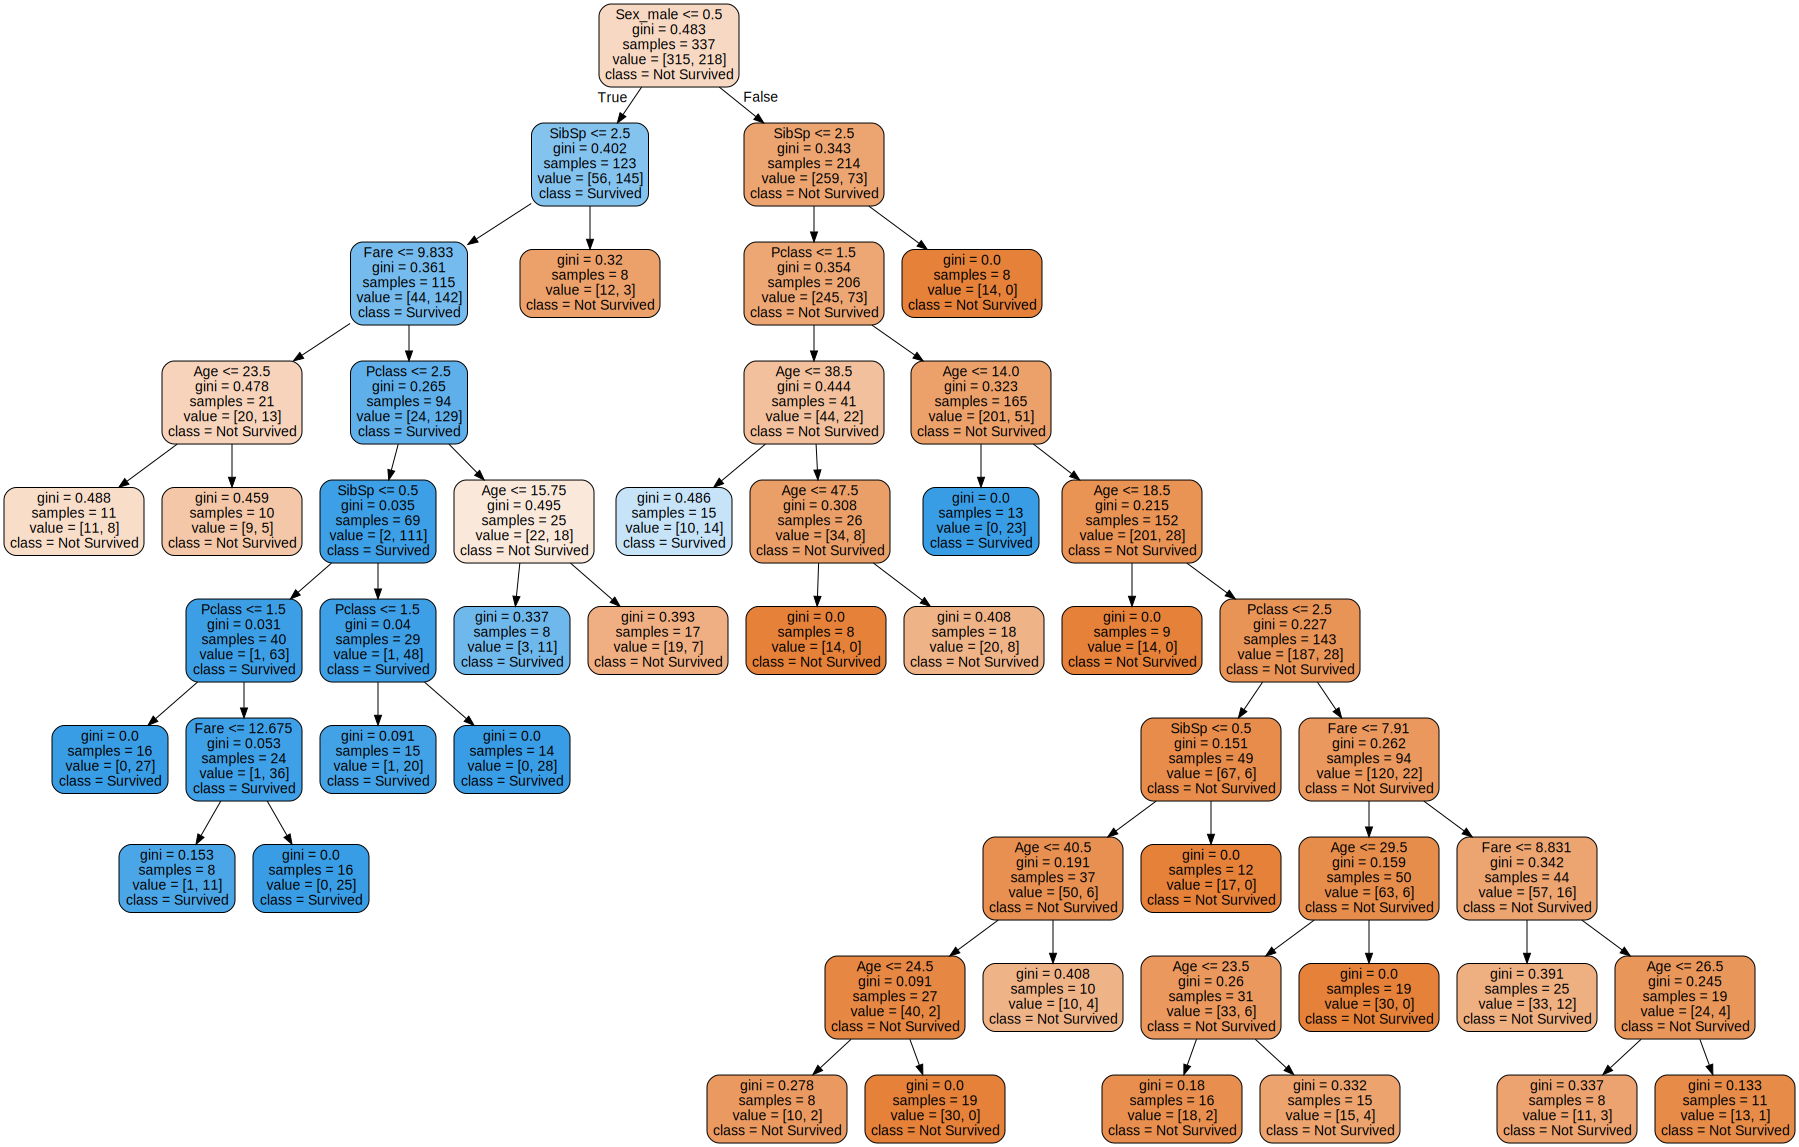

In [12]:
import graphviz
from sklearn.tree import export_graphviz

dot_data=tree.export_graphviz(clt[2],out_file=None
                              ,feature_names=X_train.columns.values
                              ,class_names=['Not Survived','Survived'],filled=True,rounded=True,leaves_parallel=False)

graph=graphviz.Source(dot_data)
graph

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

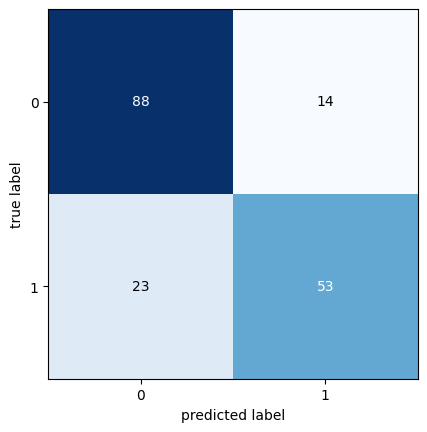

In [15]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

y_predi=clt.predict(X_test)
matrix=confusion_matrix(Y_test,y_predi)
plot_confusion_matrix(matrix)
